# LAVA Data Value
## For Mislabeled Data Detection (CIFAR-10)

In [1]:
import lava

In [2]:
import torch
import torchvision
# print(torch.__version__)
# print(torchvision.__version__)
# print(torch.version.cuda)
# print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.autograd import Variable

import matplotlib.pyplot as plt
from torch import tensor
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from copy import deepcopy as dpcp

from torch.utils.data import Dataset, TensorDataset, DataLoader

In [ ]:
! nvidia-smi

In [ ]:
cuda_num = 0
import torchvision
print(torchvision.__version__)
import torch
print(torch.__version__)
import os
os.environ["CUDA_VISIBLE_DEVICES"]=str(cuda_num)
print(os.environ["CUDA_VISIBLE_DEVICES"])
torch.cuda.set_device(cuda_num)
print("Cuda device: ", torch.cuda.current_device())
print("cude devices: ", torch.cuda.device_count())
device = torch.device('cuda:' + str(cuda_num) if torch.cuda.is_available() else 'cpu')

### Set Parameters

In [5]:
training_size = 40000
valid_size = 10000
resize = 32
portion = 0.25

### Loading Corrupted Data into DataLoaders
### Train and Test Loaders with Indices of Corrupted Data

In [ ]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='CIFAR10', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

### Load Feature Extractor for a Given Dataset
### Checkpoints provided and training files provided

In [7]:
feature_extractor = lava.load_pretrained_feature_extractor('cifar10_embedder_preact_resnet18.pth', device)

### Compute Dual Solution of Optimal Transport Problem

In [ ]:
dual_sol, trained_with_flag = lava.compute_dual(feature_extractor, loaders['train'], loaders['test'], 
                                                training_size, shuffle_ind, resize=resize)

### Compute the Data Values from Calibrated Gradient
### Visualize Detection Rate Based on LAVA

inspected: 10, found: 10 detection rate: 0.00 baseline: 1.8
inspected: 20, found: 20 detection rate: 0.00 baseline: 3.6
inspected: 30, found: 30 detection rate: 0.00 baseline: 5.4
inspected: 40, found: 40 detection rate: 0.00 baseline: 7.2
inspected: 50, found: 50 detection rate: 0.01 baseline: 9.0
inspected: 60, found: 60 detection rate: 0.01 baseline: 10.8
inspected: 70, found: 70 detection rate: 0.01 baseline: 12.6
inspected: 80, found: 80 detection rate: 0.01 baseline: 14.4
inspected: 90, found: 90 detection rate: 0.01 baseline: 16.2
inspected: 100, found: 100 detection rate: 0.01 baseline: 18.0
inspected: 110, found: 110 detection rate: 0.01 baseline: 19.8
inspected: 120, found: 120 detection rate: 0.01 baseline: 21.6
inspected: 130, found: 130 detection rate: 0.01 baseline: 23.400000000000002
inspected: 140, found: 140 detection rate: 0.01 baseline: 25.2
inspected: 150, found: 150 detection rate: 0.01 baseline: 27.0
inspected: 160, found: 160 detection rate: 0.02 baseline: 28.8
i

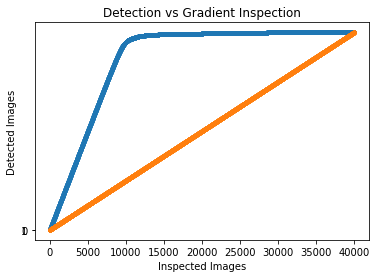

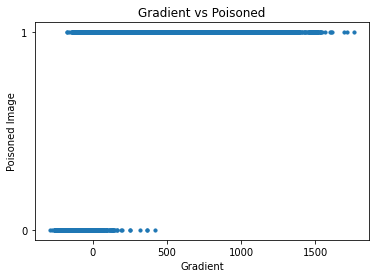

Number of poisoned images:  10000  out of 10000.
last index of poison 35275


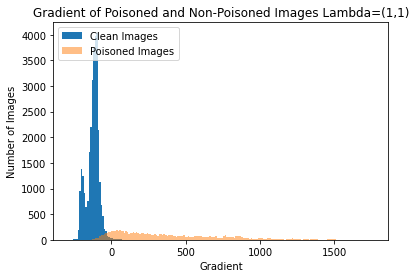

In [9]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

In [10]:
calibrated_gradient

[1760.8445,
 1711.2532,
 1695.4175,
 1610.2479,
 1607.1549,
 1595.6134,
 1565.5303,
 1541.2612,
 1536.2543,
 1532.9617,
 1531.9221,
 1531.4606,
 1531.1067,
 1520.5334,
 1519.1776,
 1514.936,
 1510.6559,
 1508.984,
 1508.4443,
 1508.3225,
 1507.6145,
 1507.4087,
 1506.1387,
 1506.0825,
 1505.9579,
 1505.8258,
 1505.611,
 1505.4696,
 1503.0316,
 1502.037,
 1501.7511,
 1499.8995,
 1499.0443,
 1498.6959,
 1495.9205,
 1494.7053,
 1494.0863,
 1493.4296,
 1492.1981,
 1492.1196,
 1491.4706,
 1491.26,
 1490.7554,
 1490.0614,
 1489.7915,
 1489.5223,
 1487.3123,
 1485.79,
 1485.4828,
 1485.435,
 1485.0864,
 1485.0663,
 1481.5033,
 1479.6412,
 1478.488,
 1478.3394,
 1475.9414,
 1475.2765,
 1474.0159,
 1473.5983,
 1472.7838,
 1471.9462,
 1471.6104,
 1469.1716,
 1468.8197,
 1468.5944,
 1467.2744,
 1465.4305,
 1465.1786,
 1463.7997,
 1463.4319,
 1462.9943,
 1462.304,
 1461.2032,
 1460.7394,
 1458.55,
 1457.2844,
 1454.6569,
 1454.6523,
 1446.8884,
 1445.7305,
 1437.895,
 1431.1599,
 1426.7028,
 1424.